# 2. Pytorchの基本機能

In [36]:
import torch
import numpy as np
import matplotlib.pyplot as plt
from torchviz import make_dot

## 2.1. 本章で学ぶ重要概念
- Pytorchでは，テンソルという独自のクラスでデータを表現する
- Pytorchの再d祭の特徴は自動微分機能

## 2.2. テンソル

- テンソル変数を作成するときには.float()で強制的にfloat32に変換する必要がある
    - Numpy変数にこの処理を忘れるとfloat64になり，nn.Linearなどではエラーがでる
- 基本的にはdtype=float32で使用するが，多値分類の損失関数であるnn.CrossEntropyとnn.NLLossは，損失関数呼び出し時に，整数型を用いることがある

In [3]:
# 0階テンソル(スカラー)
r0 = torch.tensor(1.0).float()
print(type(r0))
print(r0.dtype)
print(r0)
print(r0.shape)
print(r0.data)

<class 'torch.Tensor'>
torch.float32
tensor(1.)
torch.Size([])
tensor(1.)


In [5]:
# 1階テンソル(ベクトル)
r1_np = np.array([1,2,3,4])
print(r1_np.shape)
r1 = torch.tensor(r1_np).float()
print(r1.dtype)
print(r1.shape)
print(r1.data)

(4,)
torch.float32
torch.Size([4])
tensor([1., 2., 3., 4.])


In [6]:
# 2階テンソル(行列)
r2_np = np.array([[1,5,6],[4,3,2]])
print(r2_np.shape)
r2 = torch.tensor(r2_np).float()
print(r2.shape)
print(r2.data)

(2, 3)
torch.Size([2, 3])
tensor([[1., 5., 6.],
        [4., 3., 2.]])


In [7]:
# 3階テンソル
torch.manual_seed(123)
r3 = torch.randn((3,2,2))
print(r3.shape)
print(r3.dtype)
print(r3.data)

torch.Size([3, 2, 2])
torch.float32
tensor([[[-0.1115,  0.1204],
         [-0.3696, -0.2404]],

        [[-1.1969,  0.2093],
         [-0.9724, -0.7550]],

        [[ 0.3239, -0.1085],
         [ 0.2103, -0.3908]]])


In [8]:
# 4階テンソル
r4 = torch.ones((2,3,2,2))
print(r4.shape)
print(r4.dtype)
print(r4.data)

torch.Size([2, 3, 2, 2])
torch.float32
tensor([[[[1., 1.],
          [1., 1.]],

         [[1., 1.],
          [1., 1.]],

         [[1., 1.],
          [1., 1.]]],


        [[[1., 1.],
          [1., 1.]],

         [[1., 1.],
          [1., 1.]],

         [[1., 1.],
          [1., 1.]]]])


In [9]:
# 整数型のテンソル
r5 = r1.long()
print(r5.dtype)
print(r5)

torch.int64
tensor([1, 2, 3, 4])


In [12]:
#
# view関数 .. numpyでいうreshape
#

# -1を指定すると，この部分は自動調整される
r6 = r3.view(3, -1)
print(r3.data)
print(r3.shape)
print(r6.shape)
print(r6.data)

tensor([[[-0.1115,  0.1204],
         [-0.3696, -0.2404]],

        [[-1.1969,  0.2093],
         [-0.9724, -0.7550]],

        [[ 0.3239, -0.1085],
         [ 0.2103, -0.3908]]])
torch.Size([3, 2, 2])
torch.Size([3, 4])
tensor([[-0.1115,  0.1204, -0.3696, -0.2404],
        [-1.1969,  0.2093, -0.9724, -0.7550],
        [ 0.3239, -0.1085,  0.2103, -0.3908]])


In [14]:
# 3階 -> 1階
r7 = r3.view(-1)
print(r3.shape)
print(r7.shape)
print(r7.data)

torch.Size([3, 2, 2])
torch.Size([12])
tensor([-0.1115,  0.1204, -0.3696, -0.2404, -1.1969,  0.2093, -0.9724, -0.7550,
         0.3239, -0.1085,  0.2103, -0.3908])


In [19]:
#
# item関数 .. 数値の取り出し
#

# lossから値だけ取り出したりするときに使う
# 1階以外のテンソルにitem関数は無効(要素が一個だけの場合はときはOK)

print(r0)
print(r0.shape)
item = r0.item()
print(type(item))
print(item)

tensor(1.)
torch.Size([])
<class 'float'>
1.0


In [28]:
#
# 最大値をスカラーで取得
#

print(r2)
print(r2.max())

# 軸を指定すればvaluesとindicesとともに値を返す
print(torch.max(r2, axis=0))
print(torch.max(r2, axis=1))

# 最大値を取ったincidesだけ取得
# 多値分類で予測ラベルを求めるときに利用されるパターン
print(torch.max(r2, 1)[1])

tensor([[1., 5., 6.],
        [4., 3., 2.]])
tensor(6.)
torch.return_types.max(
values=tensor([4., 5., 6.]),
indices=tensor([1, 0, 0]))
torch.return_types.max(
values=tensor([6., 4.]),
indices=tensor([2, 0]))
tensor([2, 0])


In [29]:
#
# Numpy化
#

r2_np = r2.data.numpy()
print(type(r2_np))
print(r2_np)

<class 'numpy.ndarray'>
[[1. 5. 6.]
 [4. 3. 2.]]


## 2.3自動微分機能

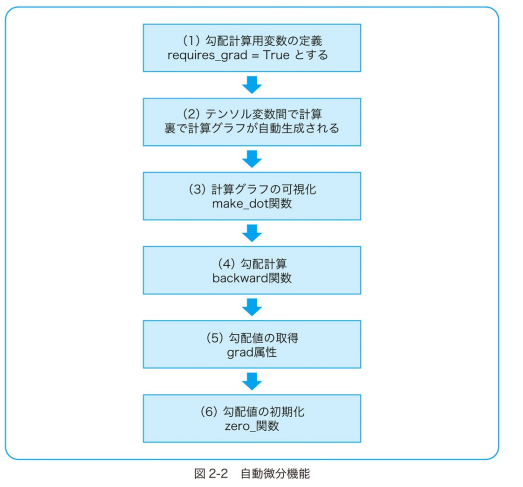

## 2.4. 2次関数の勾配計算

In [41]:
# (1) 勾配計算用変数の定義

x_np = np.arange(-2, 2.1, 0.25)
print(x_np)

x = torch.tensor(
    x_np,
    requires_grad=True,
    dtype=torch.float32)
print(len(x))
print(x)

[-2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
  1.    1.25  1.5   1.75  2.  ]
17
tensor([-2.0000, -1.7500, -1.5000, -1.2500, -1.0000, -0.7500, -0.5000, -0.2500,
         0.0000,  0.2500,  0.5000,  0.7500,  1.0000,  1.2500,  1.5000,  1.7500,
         2.0000], requires_grad=True)


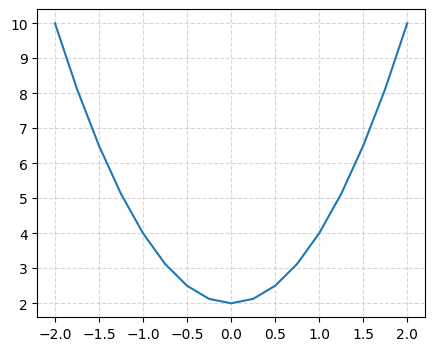

In [42]:
# (2) テンソル変数で計算


# 2次関数の計算
y = 2 * x**2 + 2

fig = plt.figure(figsize=(5,4))
ax = fig.subplots()
ax.plot(x.data, y.data)
ax.grid(ls='--', alpha=0.5)
plt.show()

In [43]:
# 勾配計算のために，1階テンソルの関数値をスカラー化する
# sumを書く要素で偏微分した結果は1なので，元の関数の微分結果を取得可能
# 詳細：https://qiita.com/makaishi2/items/a6cf19add4b6d16b8483
z = y.sum()

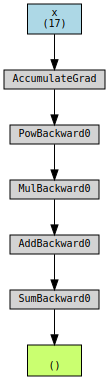

In [44]:
# (3) 計算グラフの可視化

g = make_dot(z, params={'x': x})
display(g)

- 上のノードから説明
- 青のノードはリーフノードとも呼ばれる．勾配値の計算が可能な変数を意味している
    - 17次元の1階テンソルの意味
- AccumulateGrad
    - 勾配値の蓄積用ノード
- PowBackward0
    - 指数関数の呼び出し
- MulBackward0
- AddBackward0
- SumBackward0

- 最終的な関数値ｚを計算するために，どのような関数がどういう順番で呼ばれているのかを示すのが計算グラフ

In [45]:
# (4) 勾配計算

z.backward()

In [46]:
# (5) 勾配値の取得
print(x.grad)

tensor([-8., -7., -6., -5., -4., -3., -2., -1.,  0.,  1.,  2.,  3.,  4.,  5.,
         6.,  7.,  8.])


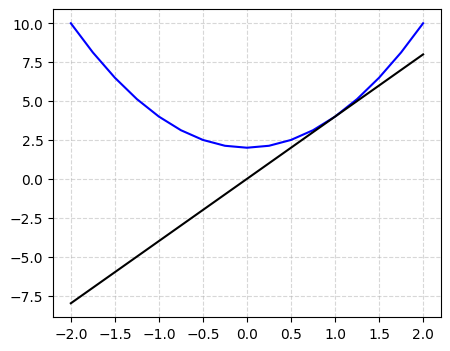

In [47]:
# 微分できていることが確認できた

fig = plt.figure(figsize=(5,4))
ax = fig.subplots()
ax.plot(x.data, y.data, c='blue')
ax.plot(x.data, x.grad, c='black')
ax.grid(ls='--', alpha=0.5)
plt.show()

In [49]:
# (6) 勾配値の初期化

y = 2 * x**2 + 2
z = y.sum()
z.backward()
# 初期化しないと勾配がどんどん蓄積される
print(x.grad)

tensor([-24., -21., -18., -15., -12.,  -9.,  -6.,  -3.,   0.,   3.,   6.,   9.,
         12.,  15.,  18.,  21.,  24.])


In [50]:
# 初期化
x.grad.zero_()
print(x.grad)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])


## 2.5. シグモイド関数の勾配計算

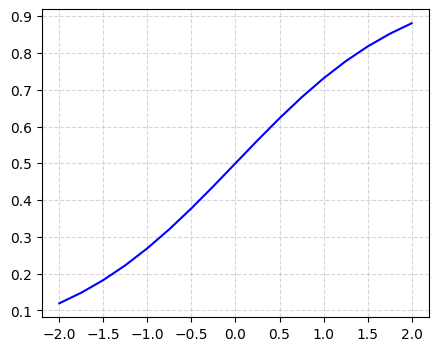

In [51]:
sigmoid = torch.nn.Sigmoid()
y  = sigmoid(x)

fig = plt.figure(figsize=(5,4))
ax = fig.subplots()
ax.plot(x.data, y.data, c='blue')
ax.grid(ls='--', alpha=0.5)
plt.show()

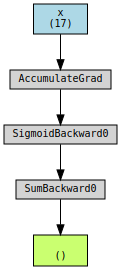

In [52]:
z = y.sum()

g = make_dot(z, params={'x': x})
display(g)

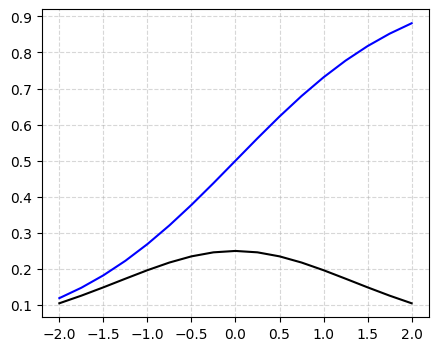

In [53]:
z.backward()

fig = plt.figure(figsize=(5,4))
ax = fig.subplots()
ax.plot(x.data, y.data, c='blue')
ax.plot(x.data, x.grad, color='black')
ax.grid(ls='--', alpha=0.5)
plt.show()